# **SMS SPAM DETECTION**

In [ ]:
import numpy as np
import pandas as pd

Import the SMS spam detection dataset from kaggle.

In [ ]:
df = pd.read_csv('spam.csv',encoding = 'latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

## **PREPROCESSING**

### ***1.Data cleaning***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Droping the unnmed2,3,4 columns from the dataset due to lack of information.

In [ ]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

Renaming the columns as 'TARGET' and 'TEXT'. The label encoding is applied.

In [ ]:
df.rename(columns = {'v1':'TARGET','v2':'TEXT'}, inplace = True)

In [ ]:
df.sample(5)

,TARGET,TEXT
2962,ham,You dont know you jabo me abi.
704,ham,True dear..i sat to pray evening and felt so.s...
3850,ham,We have all rounder:)so not required:)
2481,ham,K.:)do it at evening da:)urgent:)
1206,spam,"As a SIM subscriber, you are selected to recei..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['TARGET'] = encoder.fit_transform(df['TARGET'])

In [ ]:
df['TARGET'].value_counts()

0    4825
1     747
Name: TARGET, dtype: int64

In [ ]:
df.isnull().sum()

TARGET    0
TEXT      0
dtype: int64

Droping the duplicates from the dataset.

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

## ***2.EDA***

In [ ]:
df['TARGET'].value_counts()

0    4516
1     653
Name: TARGET, dtype: int64

We can observe the total number of HAM = 4516 (87.37%) and the number of SPAM = 653 (12.63%) fromm the below piechart.

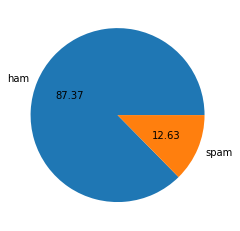

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['TARGET'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
df['NUM_CHARACTERS'] = df['TEXT'].apply(len)

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Including the columns with the dataset that contains the number of words and sentences in each SMS.

In [ ]:
df['NUM_WORDS'] = df['TEXT'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['NUM_SENTENCES'] = df['TEXT'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,TARGET,TEXT,NUM_CHARACTERS,NUM_WORDS,NUM_SENTENCES
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,TARGET,NUM_CHARACTERS,NUM_WORDS,NUM_SENTENCES
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [ ]:
df[df['TARGET']==0][['NUM_CHARACTERS','NUM_WORDS','NUM_SENTENCES']].describe()

,NUM_CHARACTERS,NUM_WORDS,NUM_SENTENCES
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
df[df['TARGET']==1][['NUM_CHARACTERS','NUM_WORDS','NUM_SENTENCES']].describe()

,NUM_CHARACTERS,NUM_WORDS,NUM_SENTENCES
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


#### **PLOT HISTOGRAM**

In [ ]:
import seaborn as sns

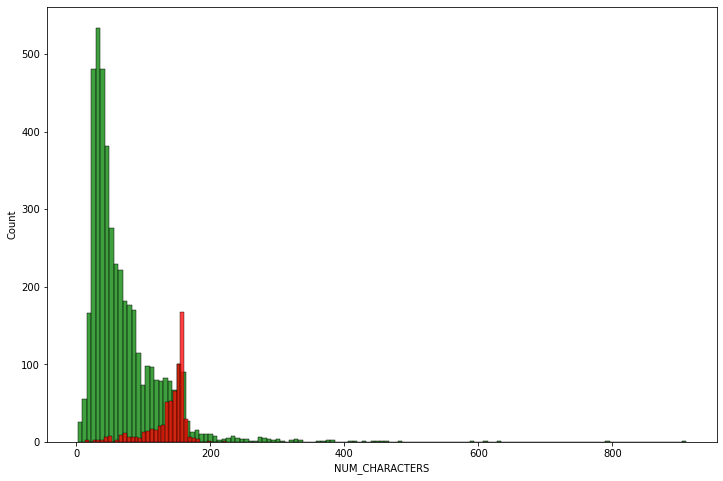

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['TARGET']==0]['NUM_CHARACTERS'], color = 'green')
sns.histplot(df[df['TARGET']==1]['NUM_CHARACTERS'], color = 'red')

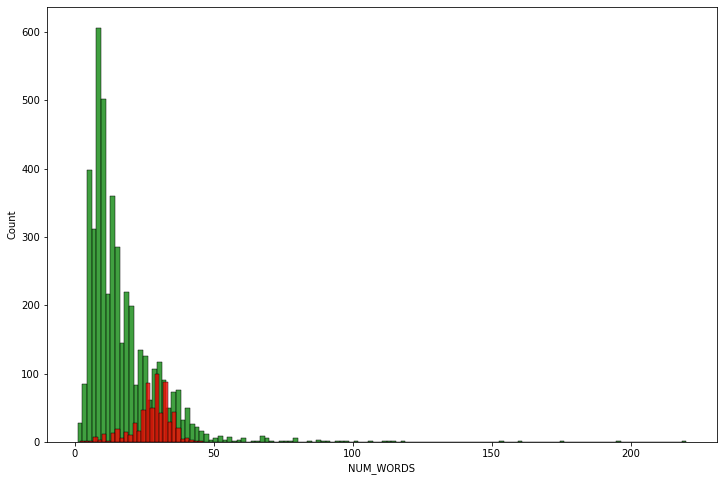

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['TARGET']==0]['NUM_WORDS'], color = 'green')
sns.histplot(df[df['TARGET']==1]['NUM_WORDS'], color = 'red')

From the above two histograms, we can conclude that more words and characters used in ham messages the the spam one.

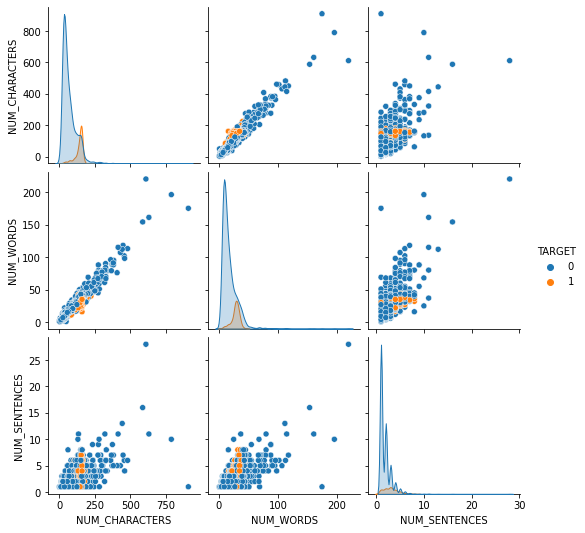

In [ ]:
sns.pairplot(df,hue = 'TARGET')

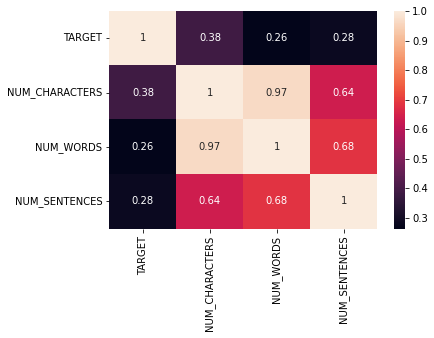

In [ ]:
sns.heatmap(df.corr(),annot = True)

## ***3.Data preprocessing***

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pip install PyStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()


    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

        
    text = y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))


    return ' '.join(y)

The stopwords, punctuation are removed from all SMS in the dataset.

In [ ]:
df['TRANSFORMED_TEXT'] = df['TEXT'].apply(transform_text)

In [ ]:
df.head()

,TARGET,TEXT,NUM_CHARACTERS,NUM_WORDS,NUM_SENTENCES,TRANSFORMED_TEXT
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


***WORD CLOUD***


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size = 10, background_color = 'white')

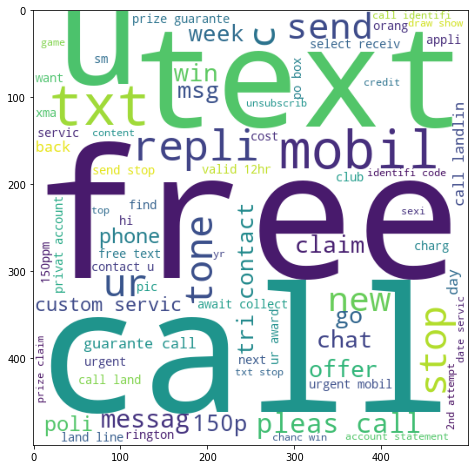

In [ ]:
plt.figure(figsize=(12,8))
spam_wc = wc.generate(df[df['TARGET']==1]['TRANSFORMED_TEXT'].str.cat(sep = "  "))
plt.imshow(spam_wc)

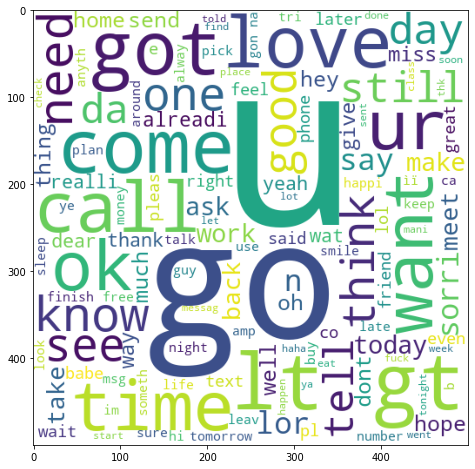

In [ ]:
plt.figure(figsize=(12,8))
ham_wc = wc.generate(df[df['TARGET']==0]['TRANSFORMED_TEXT'].str.cat(sep = "  "))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['TARGET']==1]['TRANSFORMED_TEXT'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

Here we can get top 30 words usedd in both spam and ham messages.

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
ham_corpus = []
for msg in df[df['TARGET']==0]['TRANSFORMED_TEXT'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35394

In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# **4.*MODEL* BUILDING**

## **GAUSSIAN NAIVE BAYES**

The Gaussian Naïve Bayes, Multinomial Naïve Bayes and Bernoulli Naïve Bayes to classify the SMS as ham or spam.

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['TRANSFORMED_TEXT']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = df['TARGET'].values

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=aa4e5793c61b5ff8b640c0b36db6b04e03d1f483b892c6358f9f69f49ab5fd32
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))

Accuracy =  0.8800773694390716


In [ ]:
print('Precision score = ',precision_score(y_test,y_pred))

Precision score =  0.5315315315315315


In [ ]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[792, 104],
       [ 20, 118]])

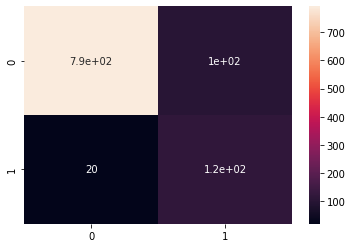

In [ ]:
sns.heatmap(cm1, annot=True)

## **RESULT:**
The obtained **accuracy** from the above "GAUSSIAN NAIVE BAYES" model is **0.88** and the **precision score** is **0.53**.